# NLP Dataset


This Jupyter notebook serves as an example on how to create a classification model for a text dataset

## Import 

In the following cell we import a lot of libraries. If you get a `ModuleNotFound` error, install the library using `pip`. 

In [2]:
# Python built-in libraries
from pathlib import Path

# Core Math and Visualization Libraries
import matplotlib.pyplot as plt
import pandas as pd
import nltk

# sci-kit (sklearn) is a Machine Learning Library
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.utils.multiclass import unique_labels

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Run this once. 
# nltk.download("punkt")
# nltk.download('wordnet')
# nltk.download('stopwords')

## Step 1. Load and explore the dataset

The first step is to load the dataset file and explore it. When exploring answer the following questions:

Q1. How many samples are there in the dataset? The amount of samples in the IMDB dataset 39,000

Q2. How many labels are there? There are two labels (positive, and negative)

Q3. Is the dataset balanced? If not, what is the distribution? Yes the dataset is balanced because there are 19505 positive and 19495 negative number of samples

In [3]:
# In this cell, we use a built-in Python library to specify paths:

# CWD stands for current working directory
CWD = Path.cwd()
dataset_filepath = CWD.joinpath('dataset', 'IMDB Dataset.csv')

Q4. What does the `cwd` method do? What does the `joinpath` method do? The "cwd" method returns a path object that represents the current working directory of the process, while "joinpath" has the function of appending one or more smaller paths to the main path object. With "joinpath" this then returns a new path. 
Q5. What are 2 additional methods in a `Path` object and describe them? Exists() is one method that checks whether the path exists in the file system. "Exists" will return True if the path points to an existing file or directory, and it will return False otherwise.

#### We use `pandas`, a library to manage CSV files. 

In [4]:
data = pd.read_csv(dataset_filepath, encoding="utf-8")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
types_of_values = data['sentiment'].value_counts()

Q6. `pandas` returns a `DataFrame` object. How can you access individual rows from the CSV file in the `DataFrame` object? To access rows within a pandas DataFrame, you can use different methods. The .loc method retrieves rows by their index labels, which is particularly useful if the DataFrame has a designated index. Another way to work with rows is by using the iterrows() function, which allows for iteration over each row, returning it as an (index, Series) pair.

### Use a `matplotlib` a data visualization library to graph the number of labels

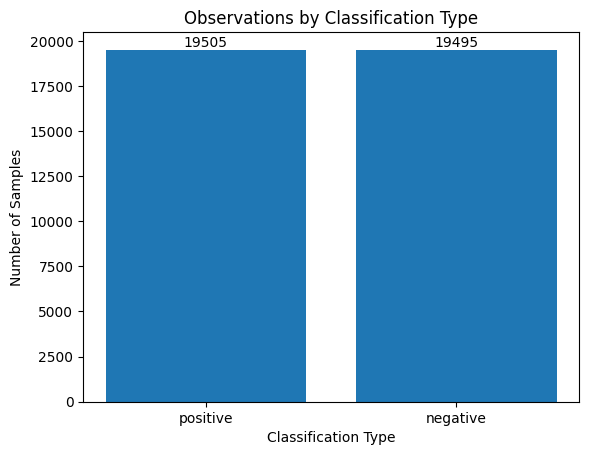

In [6]:
label_counts = data['sentiment'].value_counts()

labels = label_counts.index
counts = label_counts.values

plt.bar(labels, counts)

plt.title("Observations by Classification Type")
plt.xlabel("Classification Type")
plt.ylabel("Number of Samples")

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Q7. What does the `value_counts` method do? What type of object does it return? It counts the occurrences of unique values within a Series and returns the frequency of each value, typically in descending order. The result is a pandas Series where the index corresponds to the unique values, and the values indicate the count of each occurrence.

## Step 2. Preprocess the dataset and extract features

After we understand the nature of the dataset, in the second step, we split the dataset into train and test sets, and preprocess them. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42, )

Q8. Briefly describe how `train_test_split` method works? What are some additional parameters that the function has and we can provide? Write at least two additional parameters and describe what do they mean? The "train_test_split" function divides a dataset into training and testing subsets. This split is done randomly, with the sizes of each subset determined by the user. While the randomness ensures an unbiased split, it can be controlled using a random seed to make the results reproducible.

test_size: Determines the portion of the dataset allocated to the test set. It can be specified as a float (for example, 0.3 for 30%) or an integer (for example, 30 for 30 samples). If left unspecified, the default value is 0.25, meaning 25% of the data is used for testing, and the rest (which is 75%) will be used for training.

random_state: Manages the randomness of the data splitting process. Setting this parameter ensures reproducibility, allowing the same data split to occur each time the function is run.

In [8]:
import string

def preprocess_text(text: str) -> str:
    """
    This method processes a text by lower the letters, removing punctuation, removing stopwords, and lemmatizing the words.

    """
    
    lowercase_text = text.lower()
    lowercase_text = lowercase_text.translate(str.maketrans('', '', string.punctuation))
    split_text = lowercase_text.split()

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in split_text if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return " ".join(lemmatized_words)

Q9. In the following code snippet, we use `apply` method to preprocess the text instead of calling `preprocess_text` on each row of the dataset. How does this work? Brielfy describe how to use the `apply` method

The .apply method is a powerful tool for applying a function, such as preprocess_text, to each element in a Series or to rows/columns in a DataFrame. In the provided code snippet, apply is used to preprocess text data in X_train and X_test without requiring an explicit loop. Instead, the method passes each element of the Series to the preprocess_text function, which performs the specified transformations. The results are returned as new Series objects, preprocessed_X_train and preprocessed_X_test, containing the transformed text. For instance, if you needed to convert all text in a column to lowercase, you could use .apply with a lambda function like this: df["column_name"] = df["column_name"].apply(lambda x: x.lower()). This approach applies the lower() method to every element in the column, producing a simplified and efficient transformation compared to manual iteration.

In [9]:
preprocessed_X_train = X_train.apply(preprocess_text)
preprocessed_X_test = X_test.apply(preprocess_text)

In [10]:
def create_bag_of_words_model(preprocessed_X_train):
    """
    This method creates a bag of words model from a preprocessed text.

    """
    
    vectorizer = CountVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer
    

def create_tfidf_model(preprocessed_X_train):
    """
    This method creates a tfidf model from a preprocessed text.

    """
    
    vectorizer = TfidfVectorizer()
    vectorized_data = vectorizer.fit_transform(preprocessed_X_train)
    return vectorized_data, vectorizer


Q10. Describe `CountVectorizer` and `TfidfVectorizer` classes? What do they do?  Have you seen/written code that is similar to the implementation of these details before? "CountVectorizer" transforms a collection of text documents into a bag-of-words format, where each document is represented as a vector indicating the frequency of each word in the vocabulary. The output is a matrix with rows as documents and columns as terms. Then with "TfidfVectorizer" it functions similarly to "CountVectorizer" but instead calculates TF-IDF (Term Frequency-Inverse Document Frequency) values. These values highlight how important a term is to a specific document while reducing the influence of terms that frequently occur across all documents. Although I haven’t worked with this exact syntax before, I applied TF-IDF in Project 4a to process and analyze textual data. 


Q11. What does the `fit_transform` method do? The "fit" portion examines the input data to learn the vocabulary and relevant statistics, such as word frequencies or TF-IDF weights, while the "transform" part converts the data into a numerical matrix using the vocabulary and statistics it learned.

Q12. What are two additional methods that both classes have and what do they do?
One additional method is "get_feature_names_out()" which provides an array of the terms in the vocabulary after processing. Another additional method is "inverse_transform()" which reconstructs text from a numerical matrix by mapping the values back to their corresponding terms in the vocabulary.

In [11]:
x_train, vectorizer = create_bag_of_words_model(preprocessed_X_train)
x_test = vectorizer.transform(preprocessed_X_test)

## Step 3. Train the model

In [12]:
def train_model(x_train, y_train):
    """
    This method trains a naive bayes model.

    """
    
    model = MultinomialNB()
    model.fit(x_train, y_train)
    return model

In [13]:
model = train_model(x_train, y_train)

Q13. What are 2 additional methods of the `MultinomialNB` class? What do they do? One additional method is "predict()" which takes in new data and predicts the class labels based on the probabilities learned during training. It returns an array of predicted labels for the input samples. The second method is "predict_proba()" which is a method that provides the probability estimates for each class label. For each input sample, it returns an array where each value represents the likelihood of the sample belonging to a particular class.

Q14. What are some other variations of the Naive Bayes model available? 
One variation is the "Bernoulli Naive Bayes (BernoulliNB):" which is designed for binary or boolean features, this model is suitable when the input data consists of binary-valued attributes. Another variation is "Categorical Naive Bayes (CategoricalNB):" this one is tailored for categorical features, this model calculates probabilities directly from categorical distributions rather than assuming numerical distributions. A third variation is the "Gaussian Naive Bayes (GaussianNB):" this variation assumes that the features follow a Gaussian (normal) distribution and is often used for continuous data.

## Step 4. Evaluate the model

In [14]:
def evaluate_model(model, x_test, y_test):
    """
    This method evaluates a model.

    """
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, confusion

In [15]:
accuracy, cf_matrix = evaluate_model(model, x_test, y_test)

In [16]:
print(f"The accuracy is: {accuracy: .2f}")

The accuracy is:  0.86


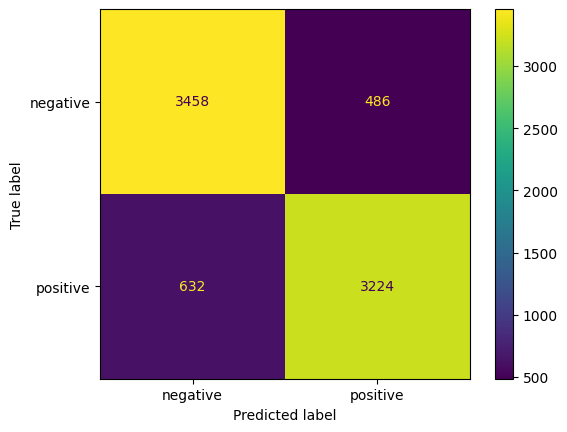

In [17]:
ConfusionMatrixDisplay(cf_matrix, display_labels=model.classes_).plot()

Q15. In step 2, we created a Bag of Words model to extract features, and then trained and evaluated the model. In the section below, use the tf-idf model to represent features and train and evaluate the model.   

Q16. Compare the accuracy of the ML model when using Bag of Words model versus TF-IDF model. Which model performed better?
Overall after comparing the accuracy of the Bag of Words model versus the TF-IDF model, we can see that the TF-IDF model performs better because it weighs the importance of each term relative to the entire dataset, unlike the Bag of Words model, which simply counts term frequencies.

## Steps 2, 3, and 4 - Using TF IDF vectors to extract features, training the model, and evaluating the model

In [18]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(preprocessed_X_train)
X_test_tfidf = vectorizer.transform(preprocessed_X_test)

model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Accuracy with TF-IDF: {accuracy_tfidf}")

Accuracy with TF-IDF: 0.8706410256410256
